# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [6]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [7]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [8]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [9]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 육류판매

In [10]:
# 육류판매만 남기기
ap_meat = df_ap_quarter[df_ap_quarter.업종명 == '육류판매'].reset_index().drop('index', axis=1)
ap_meat

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,소매,유통,육류판매,압구정동,1384578878,10,0,1
1,2017-2,소매,유통,육류판매,압구정동,1223483702,9,0,1
2,2017-3,소매,유통,육류판매,압구정동,1399748044,9,0,0
3,2017-4,소매,유통,육류판매,압구정동,1509787533,8,0,1
4,2018-1,소매,유통,육류판매,압구정동,1654745450,8,0,0
5,2018-2,소매,유통,육류판매,압구정동,1181066013,8,0,0
6,2018-3,소매,유통,육류판매,압구정동,1463792345,8,0,0
7,2018-4,소매,유통,육류판매,압구정동,1282806703,8,0,0
8,2019-1,소매,유통,육류판매,압구정동,763379968,3,0,0
9,2019-2,소매,유통,육류판매,압구정동,624339408,3,0,0


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [11]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_meat['성장성'] = ap_meat['분기당_매출_금액'] / ap_meat['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_meat['성장성'][0] = 1

ap_meat

<ipython-input-11-be13f432f31a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_meat['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,소매,유통,육류판매,압구정동,1384578878,10,0,1,1.000000
1,2017-2,소매,유통,육류판매,압구정동,1223483702,9,0,1,0.883650
2,2017-3,소매,유통,육류판매,압구정동,1399748044,9,0,0,1.144068
3,2017-4,소매,유통,육류판매,압구정동,1509787533,8,0,1,1.078614
4,2018-1,소매,유통,육류판매,압구정동,1654745450,8,0,0,1.096012
5,2018-2,소매,유통,육류판매,압구정동,1181066013,8,0,0,0.713745
6,2018-3,소매,유통,육류판매,압구정동,1463792345,8,0,0,1.239382
7,2018-4,소매,유통,육류판매,압구정동,1282806703,8,0,0,0.876358
8,2019-1,소매,유통,육류판매,압구정동,763379968,3,0,0,0.595086
9,2019-2,소매,유통,육류판매,압구정동,624339408,3,0,0,0.817862


In [12]:
# 개업률, 폐업률, 순점포증감률 추가

ap_meat['개업률'] = (ap_meat['개업점포수'] / ap_meat['총 점포수']) * 100
ap_meat['폐업률'] = (ap_meat['폐업점포수'] / ap_meat['총 점포수']) * 100
ap_meat['순점포증감률'] = ((ap_meat['개업점포수'] - ap_meat['폐업점포수']) / ap_meat['총 점포수']) * 100

ap_meat

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,소매,유통,육류판매,압구정동,1384578878,10,0,1,1.000000,0.000000,10.000000,-10.000000
1,2017-2,소매,유통,육류판매,압구정동,1223483702,9,0,1,0.883650,0.000000,11.111111,-11.111111
2,2017-3,소매,유통,육류판매,압구정동,1399748044,9,0,0,1.144068,0.000000,0.000000,0.000000
3,2017-4,소매,유통,육류판매,압구정동,1509787533,8,0,1,1.078614,0.000000,12.500000,-12.500000
4,2018-1,소매,유통,육류판매,압구정동,1654745450,8,0,0,1.096012,0.000000,0.000000,0.000000
5,2018-2,소매,유통,육류판매,압구정동,1181066013,8,0,0,0.713745,0.000000,0.000000,0.000000
6,2018-3,소매,유통,육류판매,압구정동,1463792345,8,0,0,1.239382,0.000000,0.000000,0.000000
7,2018-4,소매,유통,육류판매,압구정동,1282806703,8,0,0,0.876358,0.000000,0.000000,0.000000
8,2019-1,소매,유통,육류판매,압구정동,763379968,3,0,0,0.595086,0.000000,0.000000,0.000000
9,2019-2,소매,유통,육류판매,압구정동,624339408,3,0,0,0.817862,0.000000,0.000000,0.000000


In [13]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 육류판매만 남기기
gangnam_meat = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '육류판매'].reset_index()

################################################################################################################################################################################################

ap_meat['시장성'] = (ap_meat['분기당_매출_금액'] / ap_meat['총 점포수']) - (gangnam_meat['분기당_매출_금액'] / gangnam_meat['총 점포수'])

ap_meat = ap_meat[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_meat

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,육류판매,1384578878,1.000000,-10.000000,1.498868e+07
1,2017-2,육류판매,1223483702,0.883650,-11.111111,2.206954e+07
2,2017-3,육류판매,1399748044,1.144068,0.000000,8.476994e+06
3,2017-4,육류판매,1509787533,1.078614,-12.500000,3.845886e+07
4,2018-1,육류판매,1654745450,1.096012,0.000000,6.413210e+07
5,2018-2,육류판매,1181066013,0.713745,0.000000,2.095333e+07
6,2018-3,육류판매,1463792345,1.239382,0.000000,4.363455e+07
7,2018-4,육류판매,1282806703,0.876358,0.000000,3.026179e+07
8,2019-1,육류판매,763379968,0.595086,0.000000,1.310981e+08
9,2019-2,육류판매,624339408,0.817862,0.000000,1.092451e+08


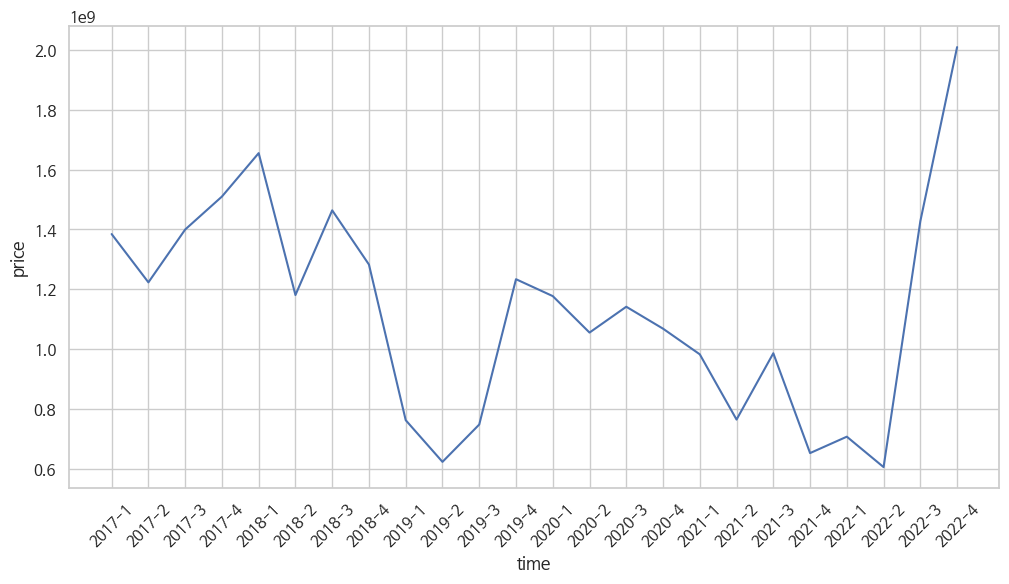

In [14]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_meat['분기'], y=ap_meat['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [15]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_meat[['성장성', '시장성', '순점포증감률']]
y = ap_meat.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000  1.498868e+07 -10.000000
1   0.883650  2.206954e+07 -11.111111
2   1.144068  8.476994e+06   0.000000
3   1.078614  3.845886e+07 -12.500000
4   1.096012  6.413210e+07   0.000000
5   0.713745  2.095333e+07   0.000000
6   1.239382  4.363455e+07   0.000000
7   0.876358  3.026179e+07   0.000000
8   0.595086  1.310981e+08   0.000000
9   0.817862  1.092451e+08   0.000000
10  1.199519  1.147543e+08   0.000000
11  1.647654  9.029599e+07  20.000000
12  0.954311  2.084519e+08   0.000000
13  0.896622  1.917921e+08   0.000000
14  1.081674  2.123221e+08   0.000000
15  0.935891  1.970836e+08   0.000000
16  0.919883  1.624536e+08   0.000000
17  0.778520  1.129506e+08   0.000000
18  1.289206  1.695613e+08   0.000000
19  0.662352  7.757550e+07   0.000000
20  1.083725  9.289989e+07   0.000000
21  0.856669  7.248577e+07   0.000000
22  2.352608  8.327616e+07  16.666667
23  1.406954  1.776538e+08   0.000000
--------------------------------------------------

In [16]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [17]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [18]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [19]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[1.         0.36694119 0.8974359 ]
 [0.4619393  0.82992832 0.38461538]]


In [20]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [21]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [22]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2383
Epoch 1: val_loss improved from inf to 0.10600, saving model to stock_model.h5
1/1 [==============================] - 9s 9s/step - loss: 0.2383 - val_loss: 0.1060
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2376
Epoch 2: val_loss improved from 0.10600 to 0.10526, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.2376 - val_loss: 0.1053
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2369
Epoch 3: val_loss improved from 0.10526 to 0.10453, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.2369 - val_loss: 0.1045
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2362
Epoch 4: val_loss improved from 0.10453 to 0.10380, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.2362 - val_loss: 0.1038
Epoch 5/300
1/1 [=================

In [23]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 705ms/step
[[0.25268522]
 [0.22614975]
 [0.24176374]
 [0.29845396]]


In [24]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.072429,0.252685
2022-2,0.000000,0.226150
2022-3,0.585542,0.241764
2022-4,1.000000,0.298454


In [25]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_meat의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.072429,0.252685,708350575,9.610276e+08,-252677073.0
2022-2,0.000000,0.226150,606822162,9.238312e+08,-317009006.0
2022-3,0.585542,0.241764,1427614462,9.457183e+08,481896126.0
2022-4,1.000000,0.298454,2008588130,1.025185e+09,983403426.0


In [26]:
df_test = df_test.reset_index()

### 결과

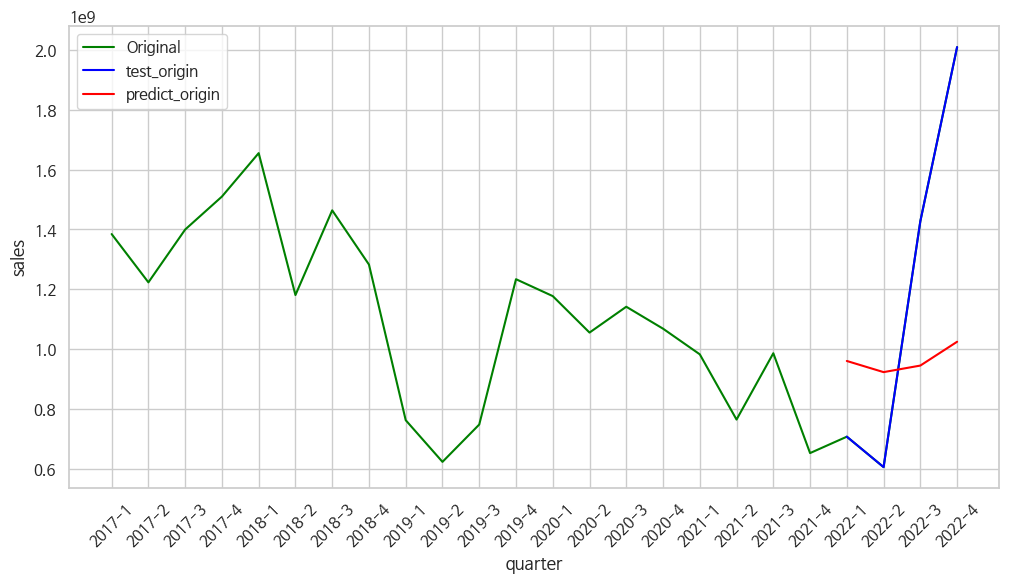

In [27]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [28]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.239034e+08
std      6.226598e+08
min     -3.170090e+08
25%     -2.687601e+08
50%      1.146095e+08
75%      6.072730e+08
max      9.834034e+08
dtype: float64

In [29]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.38709524]]
--------------------------------------------------------------------------------
예측된 매출  : 1149439104.0 


## 23년 1분기 성장성 예측

In [30]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_meat[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_meat.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성     순점포증감률
0   1384578878  1.498868e+07 -10.000000
1   1223483702  2.206954e+07 -11.111111
2   1399748044  8.476994e+06   0.000000
3   1509787533  3.845886e+07 -12.500000
4   1654745450  6.413210e+07   0.000000
5   1181066013  2.095333e+07   0.000000
6   1463792345  4.363455e+07   0.000000
7   1282806703  3.026179e+07   0.000000
8    763379968  1.310981e+08   0.000000
9    624339408  1.092451e+08   0.000000
10   748907138  1.147543e+08   0.000000
11  1233939684  9.029599e+07  20.000000
12  1177562044  2.084519e+08   0.000000
13  1055828395  1.917921e+08   0.000000
14  1142062230  2.123221e+08   0.000000
15  1068846061  1.970836e+08   0.000000
16   983213557  1.624536e+08   0.000000
17   765451589  1.129506e+08   0.000000
18   986825135  1.695613e+08   0.000000
19   653625459  7.757550e+07   0.000000
20   708350575  9.289989e+07   0.000000
21   606822162  7.248577e+07   0.000000
22  1427614462  8.327616e+07  16.666667
23  2008588130  1.776538e+08   0.000000


In [31]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [32]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [33]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.58554161 0.36694119 0.8974359 ]
 [1.         0.82992832 0.38461538]]


In [34]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [35]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1000
Epoch 1: val_loss improved from inf to 0.06410, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1000 - val_loss: 0.0641
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0995
Epoch 2: val_loss improved from 0.06410 to 0.06353, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.0995 - val_loss: 0.0635
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0990
Epoch 3: val_loss improved from 0.06353 to 0.06297, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.0990 - val_loss: 0.0630
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0985
Epoch 4: val_loss improved from 0.06297 to 0.06241, saving model to stock_model.h5
1/1 [==============================] - 0s 115ms/step - loss: 0.0985 - val_loss: 0.0624
Epoch 5/300
1/1 [================

In [37]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 661ms/step
[[0.17405058]
 [0.15203246]
 [0.15290949]
 [0.18121603]]


In [38]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.278028,0.174051
2022-2,0.148837,0.152032
2022-3,1.000000,0.152909
2022-4,0.461939,0.181216


In [39]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 3].values       # 성장성이 ap_meat의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.278028,0.174051,1.083725,0.900983,0.182742
2022-2,0.148837,0.152032,0.856669,0.862286,-0.005617
2022-3,1.000000,0.152909,2.352608,0.863828,1.488780
2022-4,0.461939,0.181216,1.406954,0.913577,0.493377


### 결과

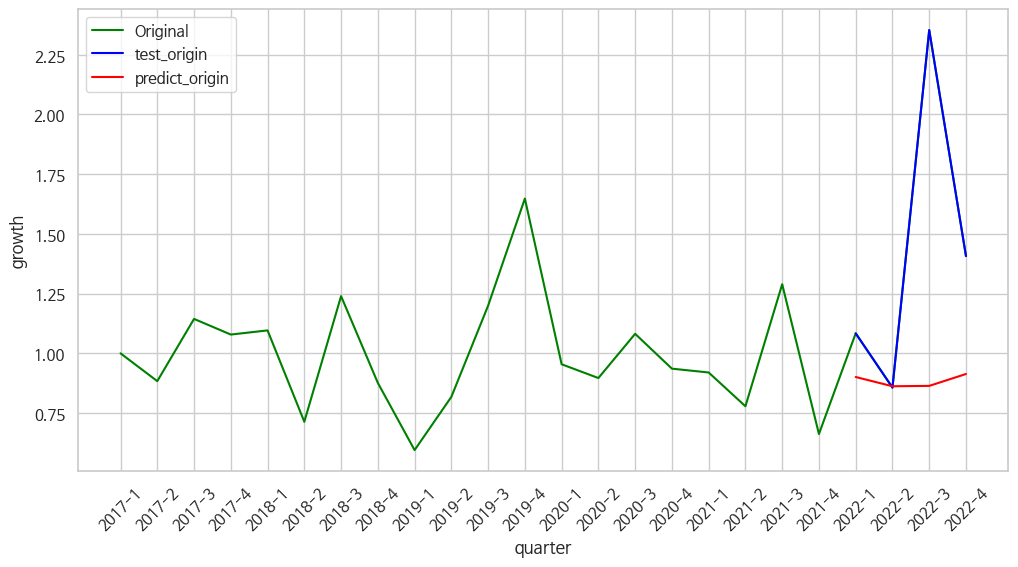

In [40]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [41]:
## error의 요약 통계량
error.describe()

count    4.000000
mean     0.539821
std      0.665254
min     -0.005617
25%      0.135652
50%      0.338060
75%      0.742228
max      1.488780
dtype: float64

In [42]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.24514596]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0259350538253784 


## 23년 1분기 시장성 예측

In [43]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_meat[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_meat.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액     순점포증감률
0   1.000000  1384578878 -10.000000
1   0.883650  1223483702 -11.111111
2   1.144068  1399748044   0.000000
3   1.078614  1509787533 -12.500000
4   1.096012  1654745450   0.000000
5   0.713745  1181066013   0.000000
6   1.239382  1463792345   0.000000
7   0.876358  1282806703   0.000000
8   0.595086   763379968   0.000000
9   0.817862   624339408   0.000000
10  1.199519   748907138   0.000000
11  1.647654  1233939684  20.000000
12  0.954311  1177562044   0.000000
13  0.896622  1055828395   0.000000
14  1.081674  1142062230   0.000000
15  0.935891  1068846061   0.000000
16  0.919883   983213557   0.000000
17  0.778520   765451589   0.000000
18  1.289206   986825135   0.000000
19  0.662352   653625459   0.000000
20  1.083725   708350575   0.000000
21  0.856669   606822162   0.000000
22  2.352608  1427614462  16.666667
23  1.406954  2008588130   0.000000
--------------------------------------------------------------------------------
             시장성
0 

In [44]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [45]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [46]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[1.         0.58554161 0.8974359 ]
 [0.4619393  1.         0.38461538]]


In [47]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [48]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1294
Epoch 1: val_loss improved from inf to 0.67909, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1294 - val_loss: 0.6791
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1289
Epoch 2: val_loss improved from 0.67909 to 0.67748, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.1289 - val_loss: 0.6775
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1283
Epoch 3: val_loss improved from 0.67748 to 0.67586, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.1283 - val_loss: 0.6759
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1277
Epoch 4: val_loss improved from 0.67586 to 0.67426, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.1277 - val_loss: 0.6743
Epoch 5/300
1/1 [=================

In [50]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 631ms/step
[[0.29454044]
 [0.27218586]
 [0.28396392]
 [0.3538295 ]]


In [51]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.414152,0.294540
2022-2,0.314007,0.272186
2022-3,0.366941,0.283964
2022-4,0.829928,0.353830


In [52]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 5].values       # 시장성이 ap_meat의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.414152,0.294540,9.289989e+07,68517616.0,2.438227e+07
2022-2,0.314007,0.272186,7.248577e+07,63960748.0,8.525021e+06
2022-3,0.366941,0.283964,8.327616e+07,66361648.0,1.691451e+07
2022-4,0.829928,0.353830,1.776538e+08,80603408.0,9.705041e+07


### 결과

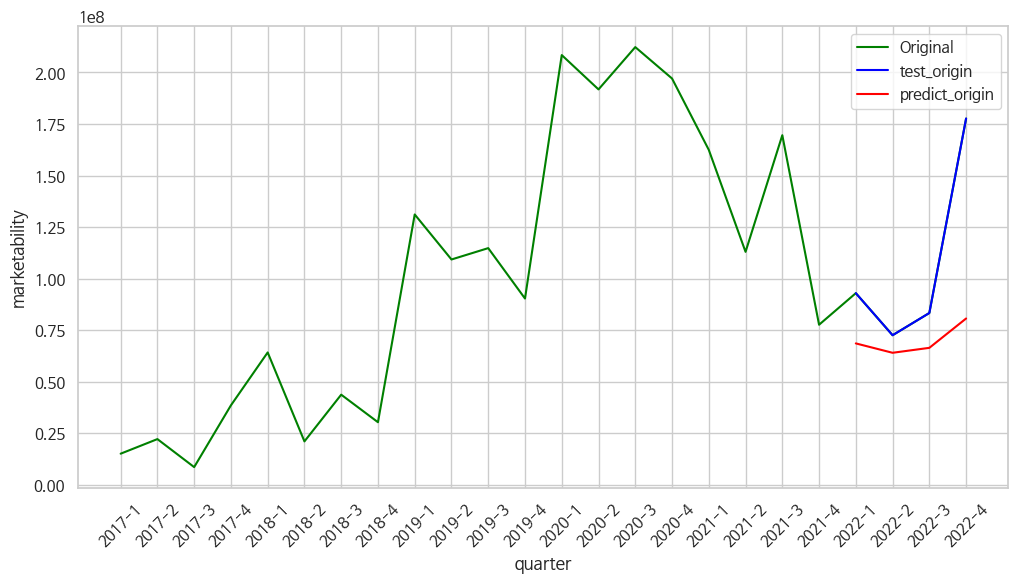

In [53]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [54]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.671805e+07
std      4.073979e+07
min      8.525021e+06
25%      1.481714e+07
50%      2.064839e+07
75%      4.254931e+07
max      9.705041e+07
dtype: float64

In [55]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 23ms/step
[[0.47061458]]
--------------------------------------------------------------------------------
예측된 시장성  : 104409472.0 


## 23년 1분기 순점포증감률 예측

In [56]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_meat[['성장성', '분기당_매출_금액', '시장성']]
y = ap_meat.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000  1384578878  1.498868e+07
1   0.883650  1223483702  2.206954e+07
2   1.144068  1399748044  8.476994e+06
3   1.078614  1509787533  3.845886e+07
4   1.096012  1654745450  6.413210e+07
5   0.713745  1181066013  2.095333e+07
6   1.239382  1463792345  4.363455e+07
7   0.876358  1282806703  3.026179e+07
8   0.595086   763379968  1.310981e+08
9   0.817862   624339408  1.092451e+08
10  1.199519   748907138  1.147543e+08
11  1.647654  1233939684  9.029599e+07
12  0.954311  1177562044  2.084519e+08
13  0.896622  1055828395  1.917921e+08
14  1.081674  1142062230  2.123221e+08
15  0.935891  1068846061  1.970836e+08
16  0.919883   983213557  1.624536e+08
17  0.778520   765451589  1.129506e+08
18  1.289206   986825135  1.695613e+08
19  0.662352   653625459  7.757550e+07
20  1.083725   708350575  9.289989e+07
21  0.856669   606822162  7.248577e+07
22  2.352608  1427614462  8.327616e+07
23  1.406954  2008588130  1.776538e+08
-------------------------

In [57]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [58]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [59]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[1.         0.58554161 0.36694119]
 [0.4619393  1.         0.82992832]]


In [60]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [61]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [62]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2349
Epoch 1: val_loss improved from inf to 0.16397, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2349 - val_loss: 0.1640
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2341
Epoch 2: val_loss improved from 0.16397 to 0.16305, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.2341 - val_loss: 0.1631
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2333
Epoch 3: val_loss improved from 0.16305 to 0.16214, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.2333 - val_loss: 0.1621
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2325
Epoch 4: val_loss improved from 0.16214 to 0.16124, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.2325 - val_loss: 0.1612
Epoch 5/300
1/1 [=================

In [63]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 670ms/step
[[0.3380082 ]
 [0.24689859]
 [0.26194903]
 [0.29023904]]


In [64]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.384615,0.338008
2022-2,0.384615,0.246899
2022-3,0.897436,0.261949
2022-4,0.384615,0.290239


In [65]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_meat의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.384615,0.338008,0.000000,-1.514734,1.514734
2022-2,0.384615,0.246899,0.000000,-4.475796,4.475796
2022-3,0.897436,0.261949,16.666667,-3.986656,20.653323
2022-4,0.384615,0.290239,0.000000,-3.067231,3.067231


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


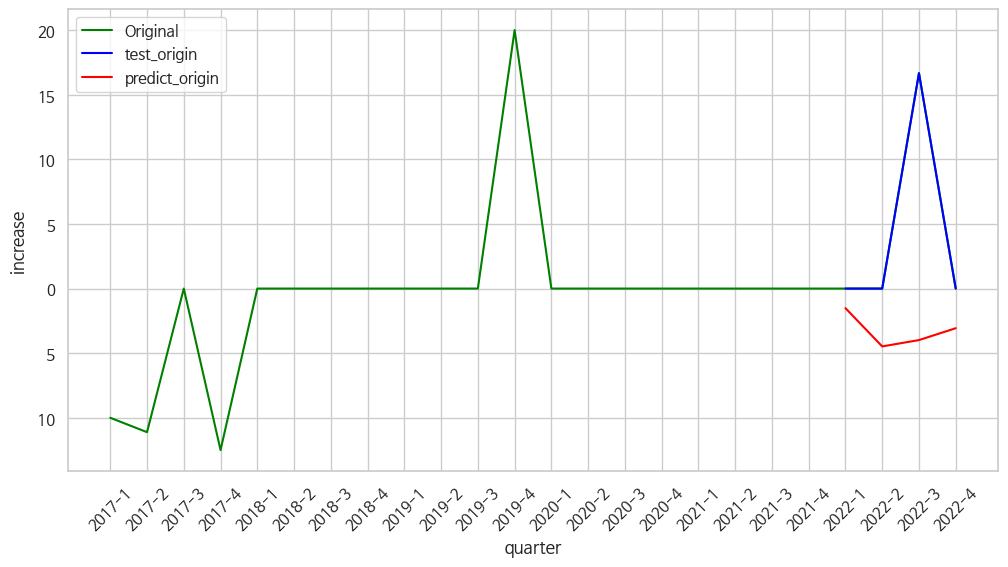

In [66]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [67]:
### error의 요약 통계량
error.describe()

count     4.000000
mean      7.427771
std       8.899582
min       1.514734
25%       2.679107
50%       3.771514
75%       8.520178
max      20.653323
dtype: float64

In [68]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 34ms/step
[[0.45079216]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 2.150745391845703 


## 원본 데이터에 예측값 추가하기

In [69]:
print(sales)
print(growth)
print(marketability)
print(increase)

1149439100.0
1.025935
104409470.0
2.1507454


In [70]:
ap_meat.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]

<ipython-input-70-e9f9a2cc87cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_meat.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]


In [71]:
ap_meat

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,육류판매,1.384579e+09,1.000000,-10.000000,1.498868e+07
1,2017-2,육류판매,1.223484e+09,0.883650,-11.111111,2.206954e+07
2,2017-3,육류판매,1.399748e+09,1.144068,0.000000,8.476994e+06
3,2017-4,육류판매,1.509788e+09,1.078614,-12.500000,3.845886e+07
4,2018-1,육류판매,1.654745e+09,1.096012,0.000000,6.413210e+07
5,2018-2,육류판매,1.181066e+09,0.713745,0.000000,2.095333e+07
6,2018-3,육류판매,1.463792e+09,1.239382,0.000000,4.363455e+07
7,2018-4,육류판매,1.282807e+09,0.876358,0.000000,3.026179e+07
8,2019-1,육류판매,7.633800e+08,0.595086,0.000000,1.310981e+08
9,2019-2,육류판매,6.243394e+08,0.817862,0.000000,1.092451e+08


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [72]:
### X / y 데이터 생성
X = ap_meat[['성장성', '시장성', '순점포증감률']]
y = ap_meat.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000  1.498868e+07 -10.000000
1   0.883650  2.206954e+07 -11.111111
2   1.144068  8.476994e+06   0.000000
3   1.078614  3.845886e+07 -12.500000
4   1.096012  6.413210e+07   0.000000
5   0.713745  2.095333e+07   0.000000
6   1.239382  4.363455e+07   0.000000
7   0.876358  3.026179e+07   0.000000
8   0.595086  1.310981e+08   0.000000
9   0.817862  1.092451e+08   0.000000
10  1.199519  1.147543e+08   0.000000
11  1.647654  9.029599e+07  20.000000
12  0.954311  2.084519e+08   0.000000
13  0.896622  1.917921e+08   0.000000
14  1.081674  2.123221e+08   0.000000
15  0.935891  1.970836e+08   0.000000
16  0.919883  1.624536e+08   0.000000
17  0.778520  1.129506e+08   0.000000
18  1.289206  1.695613e+08   0.000000
19  0.662352  7.757550e+07   0.000000
20  1.083725  9.289989e+07   0.000000
21  0.856669  7.248577e+07   0.000000
22  2.352608  8.327616e+07  16.666667
23  1.406954  1.776538e+08   0.000000
24  1.025935  1.044095e+08   2.150745
------------

In [73]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [74]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.4619393  0.82992832 0.38461538]
 [0.24514592 0.47061459 0.45079217]]


In [75]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [76]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [77]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2338
Epoch 1: val_loss improved from inf to 0.08379, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2338 - val_loss: 0.0838
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2331
Epoch 2: val_loss improved from 0.08379 to 0.08315, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2331 - val_loss: 0.0832
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2323
Epoch 3: val_loss improved from 0.08315 to 0.08252, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.2323 - val_loss: 0.0825
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2316
Epoch 4: val_loss improved from 0.08252 to 0.08190, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2316 - val_loss: 0.0819
Epoch 5/300
1/1 [=================

In [78]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 679ms/step
[[0.19747059]
 [0.20991975]
 [0.25804958]
 [0.32914722]]


In [79]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.000000,0.197471
2022-3,0.585542,0.209920
2022-4,1.000000,0.258050
2023-1,0.387095,0.329147


In [80]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_meat의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.000000,0.197471,6.068222e+08,8.836298e+08,-2.768076e+08
2022-3,0.585542,0.209920,1.427614e+09,9.010805e+08,5.265340e+08
2022-4,1.000000,0.258050,2.008588e+09,9.685473e+08,1.040041e+09
2023-1,0.387095,0.329147,1.149439e+09,1.068210e+09,8.122957e+07


In [81]:
df_test = df_test.reset_index()

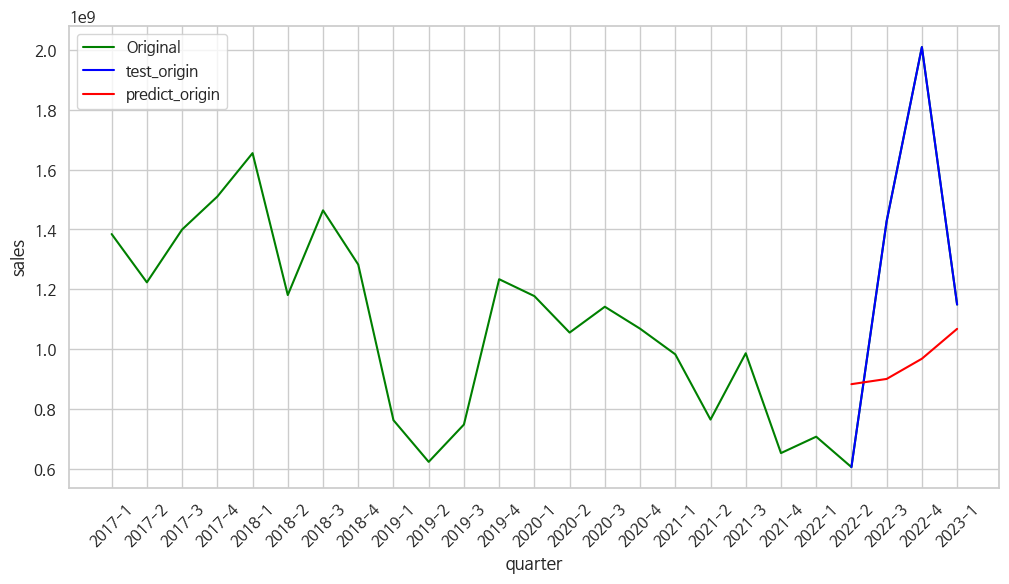

In [82]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [83]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.427492e+08
std      5.692790e+08
min     -2.768076e+08
25%     -8.279724e+06
50%      3.038818e+08
75%      6.549107e+08
max      1.040041e+09
dtype: float64

In [84]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.23637733]]
--------------------------------------------------------------------------------
예측된 매출  : 938167808.0 


### 성장성

In [85]:
### X / y 데이터 생성
X = ap_meat[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_meat.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   1.384579e+09  1.498868e+07 -10.000000
1   1.223484e+09  2.206954e+07 -11.111111
2   1.399748e+09  8.476994e+06   0.000000
3   1.509788e+09  3.845886e+07 -12.500000
4   1.654745e+09  6.413210e+07   0.000000
5   1.181066e+09  2.095333e+07   0.000000
6   1.463792e+09  4.363455e+07   0.000000
7   1.282807e+09  3.026179e+07   0.000000
8   7.633800e+08  1.310981e+08   0.000000
9   6.243394e+08  1.092451e+08   0.000000
10  7.489071e+08  1.147543e+08   0.000000
11  1.233940e+09  9.029599e+07  20.000000
12  1.177562e+09  2.084519e+08   0.000000
13  1.055828e+09  1.917921e+08   0.000000
14  1.142062e+09  2.123221e+08   0.000000
15  1.068846e+09  1.970836e+08   0.000000
16  9.832136e+08  1.624536e+08   0.000000
17  7.654516e+08  1.129506e+08   0.000000
18  9.868251e+08  1.695613e+08   0.000000
19  6.536255e+08  7.757550e+07   0.000000
20  7.083506e+08  9.289989e+07   0.000000
21  6.068222e+08  7.248577e+07   0.000000
22  1.427614e+09  8.327616e+07  16

In [86]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [87]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[1.         0.82992832 0.38461538]
 [0.38709525 0.47061459 0.45079217]]


In [88]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [89]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [90]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0957
Epoch 1: val_loss improved from inf to 0.06926, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.0957 - val_loss: 0.0693
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0952
Epoch 2: val_loss improved from 0.06926 to 0.06868, saving model to stock_model.h5
1/1 [==============================] - 0s 115ms/step - loss: 0.0952 - val_loss: 0.0687
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0947
Epoch 3: val_loss improved from 0.06868 to 0.06809, saving model to stock_model.h5
1/1 [==============================] - 0s 109ms/step - loss: 0.0947 - val_loss: 0.0681
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0942
Epoch 4: val_loss improved from 0.06809 to 0.06751, saving model to stock_model.h5
1/1 [==============================] - 0s 115ms/step - loss: 0.0942 - val_loss: 0.0675
Epoch 5/300
1/1 [==============

In [91]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 657ms/step
[[0.159237  ]
 [0.16019453]
 [0.18976046]
 [0.25595653]]


In [92]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.148837,0.159237
2022-3,1.000000,0.160195
2022-4,0.461939,0.189760
2023-1,0.245146,0.255957


In [93]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 3].values       # 성장성이 ap_meat의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.148837,0.159237,0.856669,0.874948,-0.018279
2022-3,1.000000,0.160195,2.352608,0.876631,1.475977
2022-4,0.461939,0.189760,1.406954,0.928594,0.478360
2023-1,0.245146,0.255957,1.025935,1.044935,-0.019000


In [94]:
df_test = df_test.reset_index()

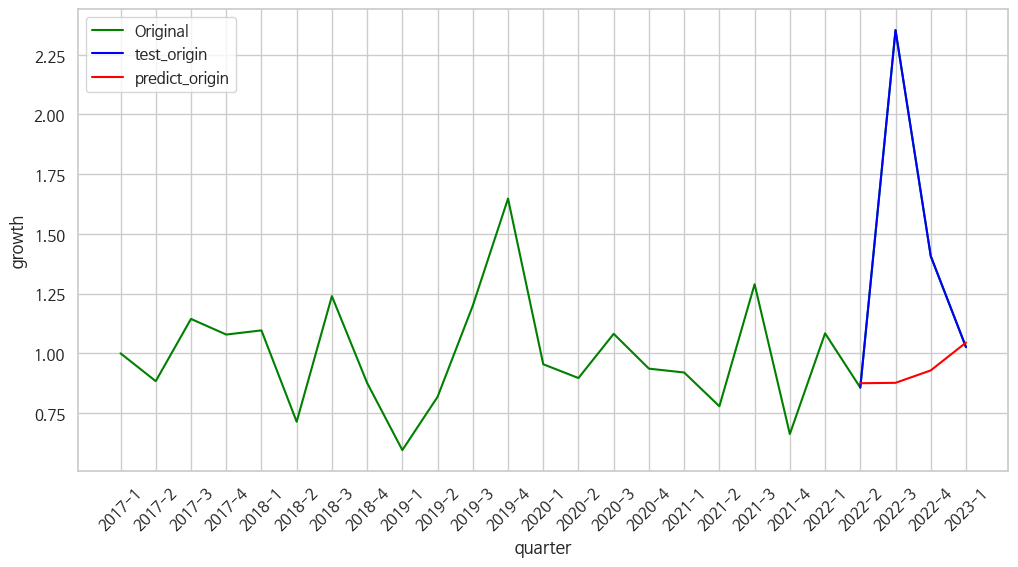

In [95]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [96]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.479264
std      0.704569
min     -0.019000
25%     -0.018459
50%      0.230041
75%      0.727764
max      1.475977
dtype: float64

In [97]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 22ms/step
[[0.23481935]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0077859163284302 


### 시장성

In [98]:
### X / y 데이터 생성
X = ap_meat[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_meat.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   1.384579e+09  1.000000 -10.000000
1   1.223484e+09  0.883650 -11.111111
2   1.399748e+09  1.144068   0.000000
3   1.509788e+09  1.078614 -12.500000
4   1.654745e+09  1.096012   0.000000
5   1.181066e+09  0.713745   0.000000
6   1.463792e+09  1.239382   0.000000
7   1.282807e+09  0.876358   0.000000
8   7.633800e+08  0.595086   0.000000
9   6.243394e+08  0.817862   0.000000
10  7.489071e+08  1.199519   0.000000
11  1.233940e+09  1.647654  20.000000
12  1.177562e+09  0.954311   0.000000
13  1.055828e+09  0.896622   0.000000
14  1.142062e+09  1.081674   0.000000
15  1.068846e+09  0.935891   0.000000
16  9.832136e+08  0.919883   0.000000
17  7.654516e+08  0.778520   0.000000
18  9.868251e+08  1.289206   0.000000
19  6.536255e+08  0.662352   0.000000
20  7.083506e+08  1.083725   0.000000
21  6.068222e+08  0.856669   0.000000
22  1.427614e+09  2.352608  16.666667
23  2.008588e+09  1.406954   0.000000
24  1.149439e+09  1.025935   2.150745
------------

In [99]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [100]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[1.         0.4619393  0.38461538]
 [0.38709525 0.24514592 0.45079217]]


In [101]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [102]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [103]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2065
Epoch 1: val_loss improved from inf to 0.57347, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2065 - val_loss: 0.5735
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2058
Epoch 2: val_loss improved from 0.57347 to 0.57202, saving model to stock_model.h5
1/1 [==============================] - 0s 112ms/step - loss: 0.2058 - val_loss: 0.5720
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2051
Epoch 3: val_loss improved from 0.57202 to 0.57058, saving model to stock_model.h5
1/1 [==============================] - 0s 99ms/step - loss: 0.2051 - val_loss: 0.5706
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2044
Epoch 4: val_loss improved from 0.57058 to 0.56914, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.2044 - val_loss: 0.5691
Epoch 5/300
1/1 [===============

In [104]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 853ms/step
[[0.32445997]
 [0.33870062]
 [0.43645725]
 [0.5993216 ]]


In [105]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.314007,0.324460
2022-3,0.366941,0.338701
2022-4,0.829928,0.436457
2023-1,0.470615,0.599322


In [106]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 5].values       # 시장성이 ap_meat의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.314007,0.324460,7.248577e+07,74616568.0,-2.130799e+06
2022-3,0.366941,0.338701,8.327616e+07,77519456.0,5.756702e+06
2022-4,0.829928,0.436457,1.776538e+08,97446664.0,8.020715e+07
2023-1,0.470615,0.599322,1.044095e+08,130645760.0,-2.623629e+07


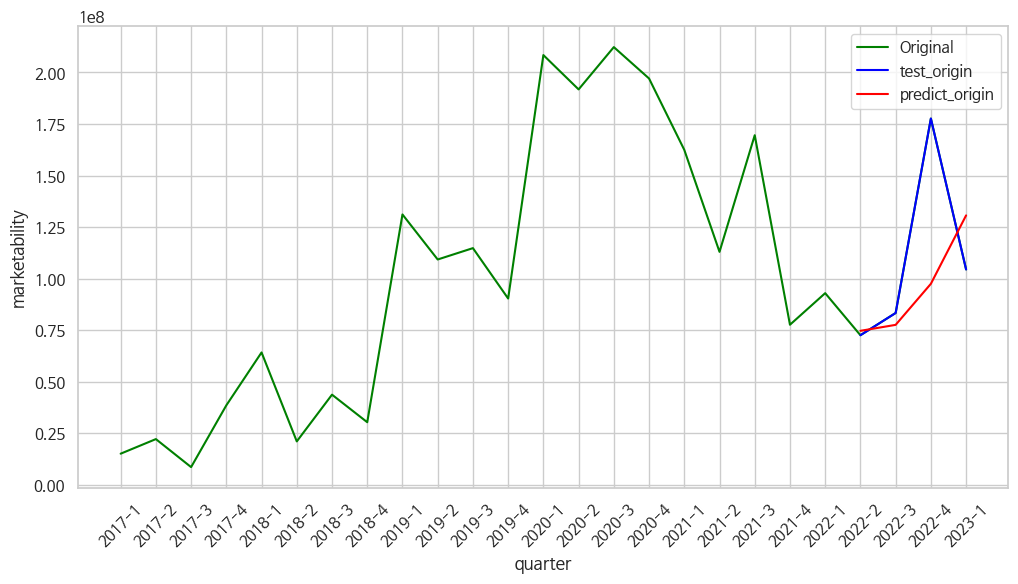

In [107]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [108]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.439919e+07
std      4.593424e+07
min     -2.623629e+07
25%     -8.157171e+06
50%      1.812951e+06
75%      2.436931e+07
max      8.020715e+07
dtype: float64

In [109]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 31ms/step
[[0.41342843]]
--------------------------------------------------------------------------------
예측된 시장성  : 92752352.0 


### 순점포증감률

In [110]:
### X / y 데이터 생성
X = ap_meat[['분기당_매출_금액', '성장성', '시장성']]
y = ap_meat.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.384579e+09  1.000000  1.498868e+07
1   1.223484e+09  0.883650  2.206954e+07
2   1.399748e+09  1.144068  8.476994e+06
3   1.509788e+09  1.078614  3.845886e+07
4   1.654745e+09  1.096012  6.413210e+07
5   1.181066e+09  0.713745  2.095333e+07
6   1.463792e+09  1.239382  4.363455e+07
7   1.282807e+09  0.876358  3.026179e+07
8   7.633800e+08  0.595086  1.310981e+08
9   6.243394e+08  0.817862  1.092451e+08
10  7.489071e+08  1.199519  1.147543e+08
11  1.233940e+09  1.647654  9.029599e+07
12  1.177562e+09  0.954311  2.084519e+08
13  1.055828e+09  0.896622  1.917921e+08
14  1.142062e+09  1.081674  2.123221e+08
15  1.068846e+09  0.935891  1.970836e+08
16  9.832136e+08  0.919883  1.624536e+08
17  7.654516e+08  0.778520  1.129506e+08
18  9.868251e+08  1.289206  1.695613e+08
19  6.536255e+08  0.662352  7.757550e+07
20  7.083506e+08  1.083725  9.289989e+07
21  6.068222e+08  0.856669  7.248577e+07
22  1.427614e+09  2.352608  8.327616e+07
23  2.008588e+09

In [111]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [112]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[1.         0.4619393  0.82992832]
 [0.38709525 0.24514592 0.47061459]]


In [113]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [114]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [115]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2243
Epoch 1: val_loss improved from inf to 0.16211, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2243 - val_loss: 0.1621
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2235
Epoch 2: val_loss improved from 0.16211 to 0.16119, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.2235 - val_loss: 0.1612
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2227
Epoch 3: val_loss improved from 0.16119 to 0.16028, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.2227 - val_loss: 0.1603
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2219
Epoch 4: val_loss improved from 0.16028 to 0.15936, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.2219 - val_loss: 0.1594
Epoch 5/300
1/1 [=================

In [116]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 658ms/step
[[0.24081834]
 [0.25205213]
 [0.27681807]
 [0.43675712]]


In [117]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.384615,0.240818
2022-3,0.897436,0.252052
2022-4,0.384615,0.276818
2023-1,0.450792,0.436757


In [118]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_meat의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.384615,0.240818,0.000000,-4.673404,4.673404
2022-3,0.897436,0.252052,16.666667,-4.308306,20.974973
2022-4,0.384615,0.276818,0.000000,-3.503413,3.503413
2023-1,0.450792,0.436757,2.150745,1.694606,0.456139


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


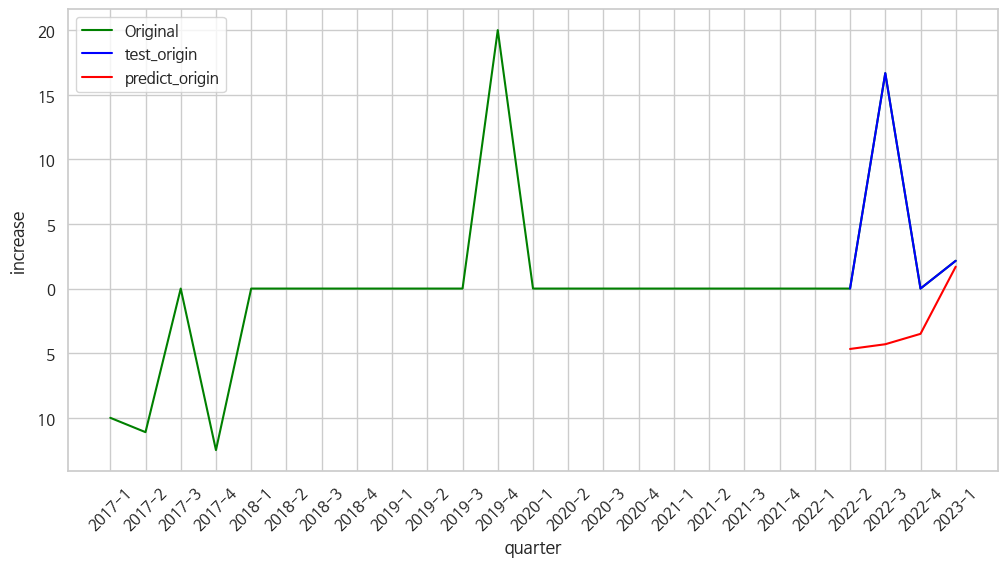

In [119]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [120]:
### error의 요약 통계량
error.describe()

count     4.000000
mean      7.401982
std       9.221619
min       0.456139
25%       2.741594
50%       4.088408
75%       8.748796
max      20.974973
dtype: float64

In [121]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 23ms/step
[[0.46054345]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 2.4676623344421387 


### 추가


In [122]:
ap_meat.loc[25] = ['2023-2', '육류판매수리리', sales, growth, increase, marketability]

<ipython-input-122-3deb3cf0889b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_meat.loc[25] = ['2023-2', '육류판매수리리', sales, growth, increase, marketability]


In [123]:
ap_meat

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,육류판매,1.384579e+09,1.000000,-10.000000,1.498868e+07
1,2017-2,육류판매,1.223484e+09,0.883650,-11.111111,2.206954e+07
2,2017-3,육류판매,1.399748e+09,1.144068,0.000000,8.476994e+06
3,2017-4,육류판매,1.509788e+09,1.078614,-12.500000,3.845886e+07
4,2018-1,육류판매,1.654745e+09,1.096012,0.000000,6.413210e+07
5,2018-2,육류판매,1.181066e+09,0.713745,0.000000,2.095333e+07
6,2018-3,육류판매,1.463792e+09,1.239382,0.000000,4.363455e+07
7,2018-4,육류판매,1.282807e+09,0.876358,0.000000,3.026179e+07
8,2019-1,육류판매,7.633800e+08,0.595086,0.000000,1.310981e+08
9,2019-2,육류판매,6.243394e+08,0.817862,0.000000,1.092451e+08


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [124]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_meat[['성장성', '시장성', '순점포증감률']]
y = ap_meat.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000  1.498868e+07 -10.000000
1   0.883650  2.206954e+07 -11.111111
2   1.144068  8.476994e+06   0.000000
3   1.078614  3.845886e+07 -12.500000
4   1.096012  6.413210e+07   0.000000
5   0.713745  2.095333e+07   0.000000
6   1.239382  4.363455e+07   0.000000
7   0.876358  3.026179e+07   0.000000
8   0.595086  1.310981e+08   0.000000
9   0.817862  1.092451e+08   0.000000
10  1.199519  1.147543e+08   0.000000
11  1.647654  9.029599e+07  20.000000
12  0.954311  2.084519e+08   0.000000
13  0.896622  1.917921e+08   0.000000
14  1.081674  2.123221e+08   0.000000
15  0.935891  1.970836e+08   0.000000
16  0.919883  1.624536e+08   0.000000
17  0.778520  1.129506e+08   0.000000
18  1.289206  1.695613e+08   0.000000
19  0.662352  7.757550e+07   0.000000
20  1.083725  9.289989e+07   0.000000
21  0.856669  7.248577e+07   0.000000
22  2.352608  8.327616e+07  16.666667
23  1.406954  1.776538e+08   0.000000
24  1.025935  1.044095e+08   2.150745
25  1.007786

In [125]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [126]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.24514592 0.47061459 0.45079217]
 [0.23481937 0.41342842 0.46054346]]


In [127]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [128]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [129]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2249
Epoch 1: val_loss improved from inf to 0.06805, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2249 - val_loss: 0.0680
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2242
Epoch 2: val_loss improved from 0.06805 to 0.06753, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.2242 - val_loss: 0.0675
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2234
Epoch 3: val_loss improved from 0.06753 to 0.06702, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.2234 - val_loss: 0.0670
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2226
Epoch 4: val_loss improved from 0.06702 to 0.06651, saving model to stock_model.h5
1/1 [==============================] - 0s 108ms/step - loss: 0.2226 - val_loss: 0.0665
Epoch 5/300
1/1 [===============

In [130]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 639ms/step
[[0.18673067]
 [0.22885816]
 [0.2883814 ]
 [0.20896819]]


In [131]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.585542,0.186731
2022-4,1.000000,0.228858
2023-1,0.387095,0.288381
2023-2,0.236377,0.208968


In [132]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_meat의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.585542,0.186731,1.427614e+09,8.685749e+08,5.590396e+08
2022-4,1.000000,0.228858,2.008588e+09,9.276278e+08,1.080960e+09
2023-1,0.387095,0.288381,1.149439e+09,1.011065e+09,1.383737e+08
2023-2,0.236377,0.208968,9.381678e+08,8.997466e+08,3.842118e+07


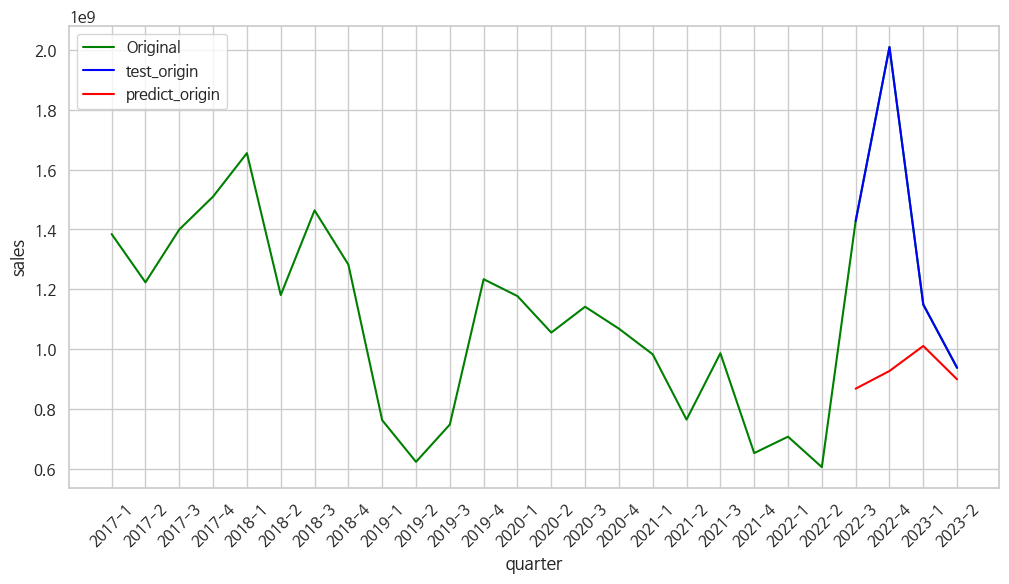

In [133]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [134]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.541987e+08
std      4.748467e+08
min      3.842118e+07
25%      1.133856e+08
50%      3.487066e+08
75%      6.895198e+08
max      1.080960e+09
dtype: float64

In [135]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.1983316]]
--------------------------------------------------------------------------------
예측된 매출  : 884836672.0 


### 성장성

In [136]:
X = ap_meat[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_meat.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   1.384579e+09  1.498868e+07 -10.000000
1   1.223484e+09  2.206954e+07 -11.111111
2   1.399748e+09  8.476994e+06   0.000000
3   1.509788e+09  3.845886e+07 -12.500000
4   1.654745e+09  6.413210e+07   0.000000
5   1.181066e+09  2.095333e+07   0.000000
6   1.463792e+09  4.363455e+07   0.000000
7   1.282807e+09  3.026179e+07   0.000000
8   7.633800e+08  1.310981e+08   0.000000
9   6.243394e+08  1.092451e+08   0.000000
10  7.489071e+08  1.147543e+08   0.000000
11  1.233940e+09  9.029599e+07  20.000000
12  1.177562e+09  2.084519e+08   0.000000
13  1.055828e+09  1.917921e+08   0.000000
14  1.142062e+09  2.123221e+08   0.000000
15  1.068846e+09  1.970836e+08   0.000000
16  9.832136e+08  1.624536e+08   0.000000
17  7.654516e+08  1.129506e+08   0.000000
18  9.868251e+08  1.695613e+08   0.000000
19  6.536255e+08  7.757550e+07   0.000000
20  7.083506e+08  9.289989e+07   0.000000
21  6.068222e+08  7.248577e+07   0.000000
22  1.427614e+09  8.327616e+07  16

In [137]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [138]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.38709525 0.47061459 0.45079217]
 [0.23637729 0.41342842 0.46054346]]


In [139]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [140]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [141]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0914
Epoch 1: val_loss improved from inf to 0.06743, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.0914 - val_loss: 0.0674
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0909
Epoch 2: val_loss improved from 0.06743 to 0.06688, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.0909 - val_loss: 0.0669
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0903
Epoch 3: val_loss improved from 0.06688 to 0.06632, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.0903 - val_loss: 0.0663
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0898
Epoch 4: val_loss improved from 0.06632 to 0.06577, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.0898 - val_loss: 0.0658
Epoch 5/300
1/1 [=================

In [142]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 645ms/step
[[0.16809547]
 [0.19852245]
 [0.26774517]
 [0.245916  ]]


In [143]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,1.000000,0.168095
2022-4,0.461939,0.198522
2023-1,0.245146,0.267745
2023-2,0.234819,0.245916


In [144]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 3].values       # 성장성이 ap_meat의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,1.000000,0.168095,2.352608,0.890517,1.462090
2022-4,0.461939,0.198522,1.406954,0.943993,0.462961
2023-1,0.245146,0.267745,1.025935,1.065654,-0.039719
2023-2,0.234819,0.245916,1.007786,1.027288,-0.019503


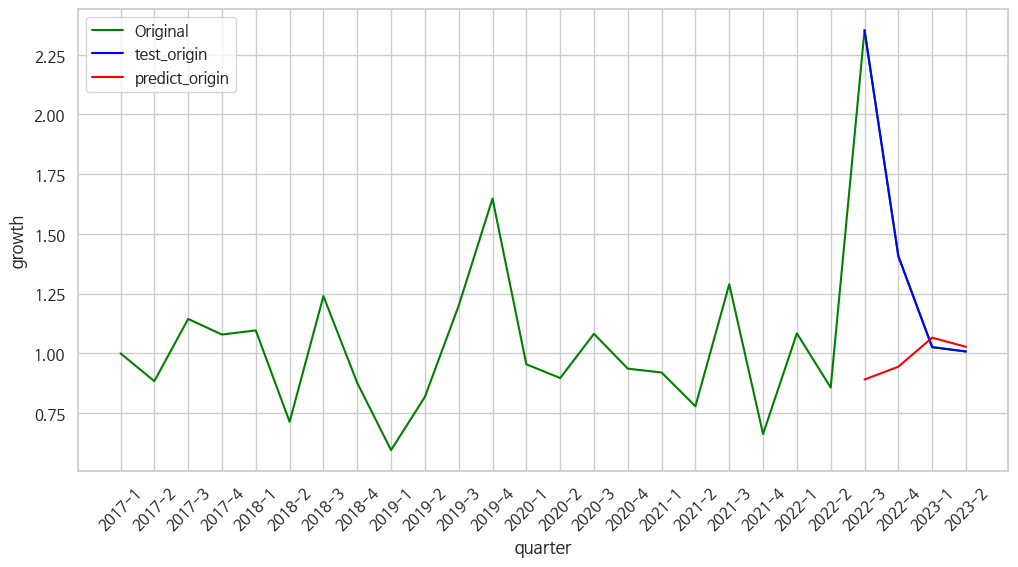

In [145]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [146]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.466458
std      0.703247
min     -0.039719
25%     -0.024557
50%      0.221729
75%      0.712743
max      1.462090
dtype: float64

In [147]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 22ms/step
[[0.20197505]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9500613808631897 


### 시장성

In [148]:
### X / y 데이터 생성
X = ap_meat[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_meat.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   1.384579e+09  1.000000 -10.000000
1   1.223484e+09  0.883650 -11.111111
2   1.399748e+09  1.144068   0.000000
3   1.509788e+09  1.078614 -12.500000
4   1.654745e+09  1.096012   0.000000
5   1.181066e+09  0.713745   0.000000
6   1.463792e+09  1.239382   0.000000
7   1.282807e+09  0.876358   0.000000
8   7.633800e+08  0.595086   0.000000
9   6.243394e+08  0.817862   0.000000
10  7.489071e+08  1.199519   0.000000
11  1.233940e+09  1.647654  20.000000
12  1.177562e+09  0.954311   0.000000
13  1.055828e+09  0.896622   0.000000
14  1.142062e+09  1.081674   0.000000
15  1.068846e+09  0.935891   0.000000
16  9.832136e+08  0.919883   0.000000
17  7.654516e+08  0.778520   0.000000
18  9.868251e+08  1.289206   0.000000
19  6.536255e+08  0.662352   0.000000
20  7.083506e+08  1.083725   0.000000
21  6.068222e+08  0.856669   0.000000
22  1.427614e+09  2.352608  16.666667
23  2.008588e+09  1.406954   0.000000
24  1.149439e+09  1.025935   2.150745
25  9.381678

In [149]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [150]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.38709525 0.24514592 0.45079217]
 [0.23637729 0.23481937 0.46054346]]


In [151]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [152]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [153]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2610
Epoch 1: val_loss improved from inf to 0.47927, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2610 - val_loss: 0.4793
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2602
Epoch 2: val_loss improved from 0.47927 to 0.47806, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2602 - val_loss: 0.4781
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2593
Epoch 3: val_loss improved from 0.47806 to 0.47686, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.2593 - val_loss: 0.4769
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2585
Epoch 4: val_loss improved from 0.47686 to 0.47565, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.2585 - val_loss: 0.4757
Epoch 5/300
1/1 [=================

In [154]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 652ms/step
[[0.36151874]
 [0.47066075]
 [0.67602545]
 [0.4701051 ]]


In [155]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.366941,0.361519
2022-4,0.829928,0.470661
2023-1,0.470615,0.676025
2023-2,0.413428,0.470105


In [156]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 5].values       # 시장성이 ap_meat의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.366941,0.361519,8.327616e+07,82170816.0,1.105342e+06
2022-4,0.829928,0.470661,1.776538e+08,104418880.0,7.323493e+07
2023-1,0.470615,0.676025,1.044095e+08,146281472.0,-4.187200e+07
2023-2,0.413428,0.470105,9.275235e+07,104305616.0,-1.155326e+07


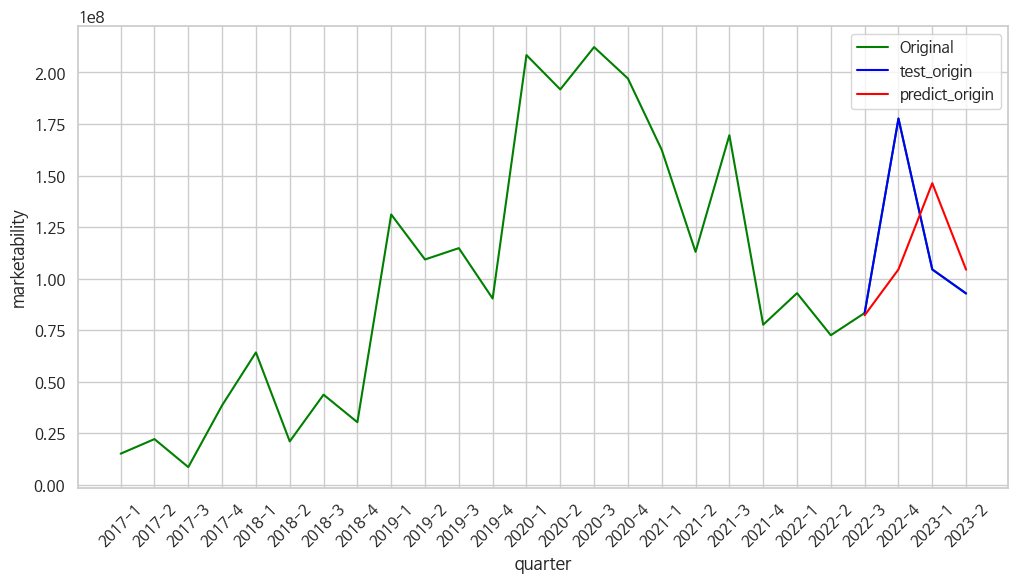

In [157]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [158]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     5.228753e+06
std      4.879194e+07
min     -4.187200e+07
25%     -1.913295e+07
50%     -5.223961e+06
75%      1.913774e+07
max      7.323493e+07
dtype: float64

In [159]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 25ms/step
[[0.42072907]]
--------------------------------------------------------------------------------
예측된 시장성  : 94240552.0 


### 순점포증감률

In [160]:
### X / y 데이터 생성
X = ap_meat[['분기당_매출_금액', '성장성', '시장성']]
y = ap_meat.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.384579e+09  1.000000  1.498868e+07
1   1.223484e+09  0.883650  2.206954e+07
2   1.399748e+09  1.144068  8.476994e+06
3   1.509788e+09  1.078614  3.845886e+07
4   1.654745e+09  1.096012  6.413210e+07
5   1.181066e+09  0.713745  2.095333e+07
6   1.463792e+09  1.239382  4.363455e+07
7   1.282807e+09  0.876358  3.026179e+07
8   7.633800e+08  0.595086  1.310981e+08
9   6.243394e+08  0.817862  1.092451e+08
10  7.489071e+08  1.199519  1.147543e+08
11  1.233940e+09  1.647654  9.029599e+07
12  1.177562e+09  0.954311  2.084519e+08
13  1.055828e+09  0.896622  1.917921e+08
14  1.142062e+09  1.081674  2.123221e+08
15  1.068846e+09  0.935891  1.970836e+08
16  9.832136e+08  0.919883  1.624536e+08
17  7.654516e+08  0.778520  1.129506e+08
18  9.868251e+08  1.289206  1.695613e+08
19  6.536255e+08  0.662352  7.757550e+07
20  7.083506e+08  1.083725  9.289989e+07
21  6.068222e+08  0.856669  7.248577e+07
22  1.427614e+09  2.352608  8.327616e+07
23  2.008588e+09

In [161]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [162]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.38709525 0.24514592 0.47061459]
 [0.23637729 0.23481937 0.41342842]]


In [163]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [164]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [165]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2197
Epoch 1: val_loss improved from inf to 0.16048, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2197 - val_loss: 0.1605
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2189
Epoch 2: val_loss improved from 0.16048 to 0.15960, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.2189 - val_loss: 0.1596
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2181
Epoch 3: val_loss improved from 0.15960 to 0.15873, saving model to stock_model.h5
1/1 [==============================] - 0s 110ms/step - loss: 0.2181 - val_loss: 0.1587
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2173
Epoch 4: val_loss improved from 0.15873 to 0.15786, saving model to stock_model.h5
1/1 [==============================] - 0s 117ms/step - loss: 0.2173 - val_loss: 0.1579
Epoch 5/300
1/1 [==============

In [166]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 632ms/step
[[0.258158  ]
 [0.28340197]
 [0.447879  ]
 [0.4713229 ]]


In [167]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.897436,0.258158
2022-4,0.384615,0.283402
2023-1,0.450792,0.447879
2023-2,0.460543,0.471323


In [168]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_meat의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.897436,0.258158,16.666667,-4.109865,20.776532
2022-4,0.384615,0.283402,0.000000,-3.289436,3.289436
2023-1,0.450792,0.447879,2.150745,2.056067,0.094678
2023-2,0.460543,0.471323,2.467662,2.817994,-0.350332


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


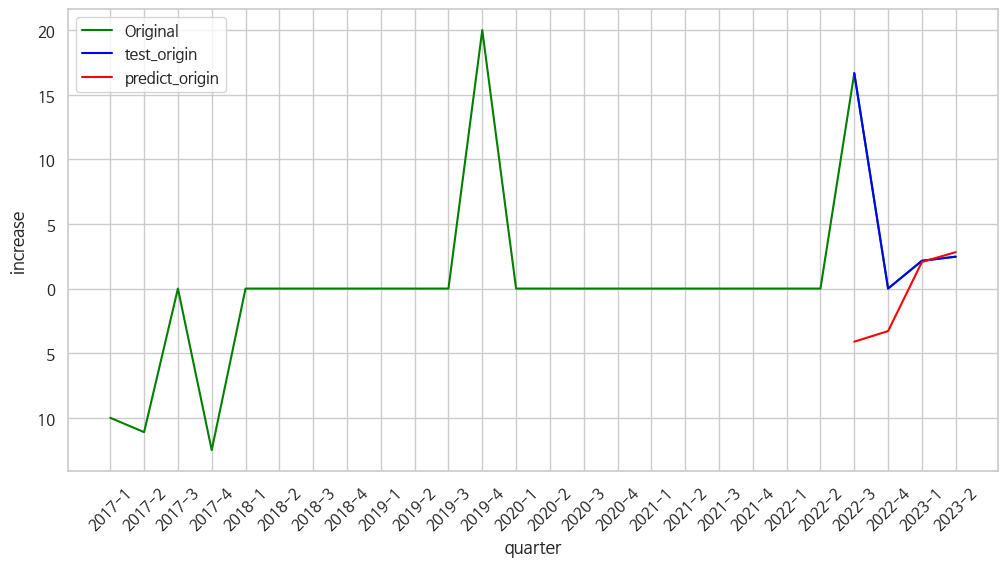

In [169]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [170]:
### error의 요약 통계량
error.describe()

count     4.000000
mean      5.952579
std      10.014716
min      -0.350332
25%      -0.016574
50%       1.692057
75%       7.661210
max      20.776532
dtype: float64

In [171]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 24ms/step
[[0.321372]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.0554099082946777 


### 추가

In [172]:
ap_meat.loc[26] = ['2023-3', '육류판매', sales, growth, increase, marketability]

<ipython-input-172-9ead23ee921e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_meat.loc[26] = ['2023-3', '육류판매', sales, growth, increase, marketability]


In [173]:
ap_meat

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,육류판매,1.384579e+09,1.000000,-10.000000,1.498868e+07
1,2017-2,육류판매,1.223484e+09,0.883650,-11.111111,2.206954e+07
2,2017-3,육류판매,1.399748e+09,1.144068,0.000000,8.476994e+06
3,2017-4,육류판매,1.509788e+09,1.078614,-12.500000,3.845886e+07
4,2018-1,육류판매,1.654745e+09,1.096012,0.000000,6.413210e+07
5,2018-2,육류판매,1.181066e+09,0.713745,0.000000,2.095333e+07
6,2018-3,육류판매,1.463792e+09,1.239382,0.000000,4.363455e+07
7,2018-4,육류판매,1.282807e+09,0.876358,0.000000,3.026179e+07
8,2019-1,육류판매,7.633800e+08,0.595086,0.000000,1.310981e+08
9,2019-2,육류판매,6.243394e+08,0.817862,0.000000,1.092451e+08


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [174]:
### X / y 데이터 생성
X = ap_meat[['성장성', '시장성', '순점포증감률']]
y = ap_meat.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000  1.498868e+07 -10.000000
1   0.883650  2.206954e+07 -11.111111
2   1.144068  8.476994e+06   0.000000
3   1.078614  3.845886e+07 -12.500000
4   1.096012  6.413210e+07   0.000000
5   0.713745  2.095333e+07   0.000000
6   1.239382  4.363455e+07   0.000000
7   0.876358  3.026179e+07   0.000000
8   0.595086  1.310981e+08   0.000000
9   0.817862  1.092451e+08   0.000000
10  1.199519  1.147543e+08   0.000000
11  1.647654  9.029599e+07  20.000000
12  0.954311  2.084519e+08   0.000000
13  0.896622  1.917921e+08   0.000000
14  1.081674  2.123221e+08   0.000000
15  0.935891  1.970836e+08   0.000000
16  0.919883  1.624536e+08   0.000000
17  0.778520  1.129506e+08   0.000000
18  1.289206  1.695613e+08   0.000000
19  0.662352  7.757550e+07   0.000000
20  1.083725  9.289989e+07   0.000000
21  0.856669  7.248577e+07   0.000000
22  2.352608  8.327616e+07  16.666667
23  1.406954  1.776538e+08   0.000000
24  1.025935  1.044095e+08   2.150745
25  1.007786

In [175]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [176]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.23481937 0.41342842 0.46054346]
 [0.20197509 0.42072906 0.321372  ]]


In [177]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [178]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [179]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2249
Epoch 1: val_loss improved from inf to 0.10120, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2249 - val_loss: 0.1012
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2242
Epoch 2: val_loss improved from 0.10120 to 0.10061, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.2242 - val_loss: 0.1006
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2234
Epoch 3: val_loss improved from 0.10061 to 0.10002, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2234 - val_loss: 0.1000
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2226
Epoch 4: val_loss improved from 0.10002 to 0.09944, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.2226 - val_loss: 0.0994
Epoch 5/300
1/1 [=================

In [180]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 685ms/step
[[0.2779796 ]
 [0.35674876]
 [0.2561063 ]
 [0.24101017]]


In [181]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,1.000000,0.277980
2023-1,0.387095,0.356749
2023-2,0.236377,0.256106
2023-3,0.198332,0.241010


In [182]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_meat의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,1.000000,0.277980,2.008588e+09,9.964845e+08,1.012104e+09
2023-1,0.387095,0.356749,1.149439e+09,1.106900e+09,4.253862e+07
2023-2,0.236377,0.256106,9.381678e+08,9.658232e+08,-2.765542e+07
2023-3,0.198332,0.241010,8.848367e+08,9.446620e+08,-5.982534e+07


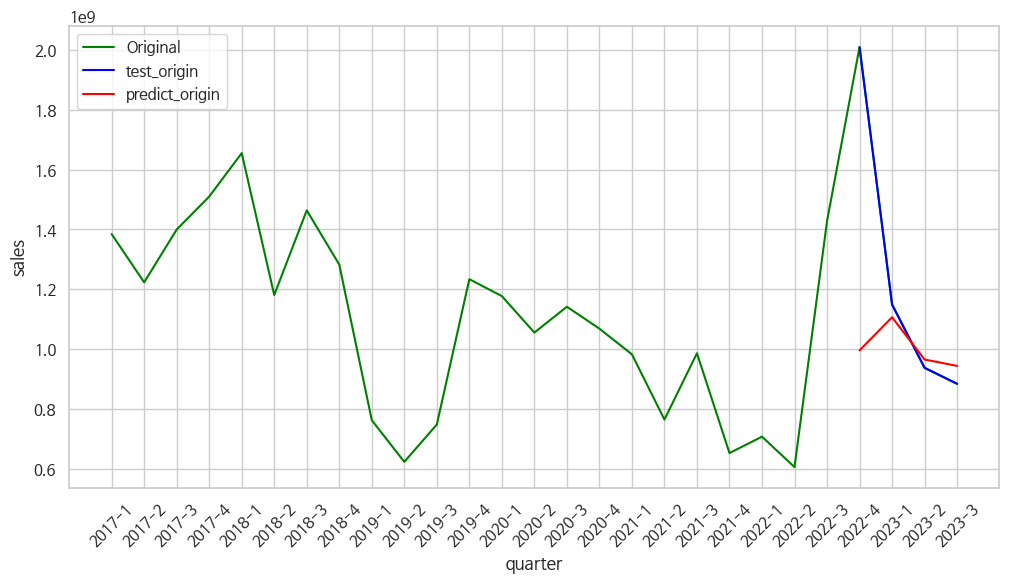

In [183]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [184]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.417904e+08
std      5.153176e+08
min     -5.982534e+07
25%     -3.569790e+07
50%      7.441600e+06
75%      2.849299e+08
max      1.012104e+09
dtype: float64

In [185]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 27ms/step
[[0.2308567]]
--------------------------------------------------------------------------------
예측된 매출  : 930429248.0 


### 성장성

In [186]:
X = ap_meat[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_meat.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   1.384579e+09  1.498868e+07 -10.000000
1   1.223484e+09  2.206954e+07 -11.111111
2   1.399748e+09  8.476994e+06   0.000000
3   1.509788e+09  3.845886e+07 -12.500000
4   1.654745e+09  6.413210e+07   0.000000
5   1.181066e+09  2.095333e+07   0.000000
6   1.463792e+09  4.363455e+07   0.000000
7   1.282807e+09  3.026179e+07   0.000000
8   7.633800e+08  1.310981e+08   0.000000
9   6.243394e+08  1.092451e+08   0.000000
10  7.489071e+08  1.147543e+08   0.000000
11  1.233940e+09  9.029599e+07  20.000000
12  1.177562e+09  2.084519e+08   0.000000
13  1.055828e+09  1.917921e+08   0.000000
14  1.142062e+09  2.123221e+08   0.000000
15  1.068846e+09  1.970836e+08   0.000000
16  9.832136e+08  1.624536e+08   0.000000
17  7.654516e+08  1.129506e+08   0.000000
18  9.868251e+08  1.695613e+08   0.000000
19  6.536255e+08  7.757550e+07   0.000000
20  7.083506e+08  9.289989e+07   0.000000
21  6.068222e+08  7.248577e+07   0.000000
22  1.427614e+09  8.327616e+07  16

In [187]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [188]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.23637729 0.41342842 0.46054346]
 [0.19833162 0.42072906 0.321372  ]]


In [189]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [190]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [191]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0914
Epoch 1: val_loss improved from inf to 0.17522, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.0914 - val_loss: 0.1752
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0909
Epoch 2: val_loss improved from 0.17522 to 0.17452, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.0909 - val_loss: 0.1745
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0903
Epoch 3: val_loss improved from 0.17452 to 0.17383, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.0903 - val_loss: 0.1738
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0898
Epoch 4: val_loss improved from 0.17383 to 0.17313, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.0898 - val_loss: 0.1731
Epoch 5/300
1/1 [=================

In [192]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 669ms/step
[[0.24691278]
 [0.31786352]
 [0.2992729 ]
 [0.25247914]]


In [193]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.461939,0.246913
2023-1,0.245146,0.317864
2023-2,0.234819,0.299273
2023-3,0.201975,0.252479


In [194]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 3].values       # 성장성이 ap_meat의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.461939,0.246913,1.406954,1.029040,0.377914
2023-1,0.245146,0.317864,1.025935,1.153738,-0.127803
2023-2,0.234819,0.299273,1.007786,1.121064,-0.113279
2023-3,0.201975,0.252479,0.950061,1.038823,-0.088762


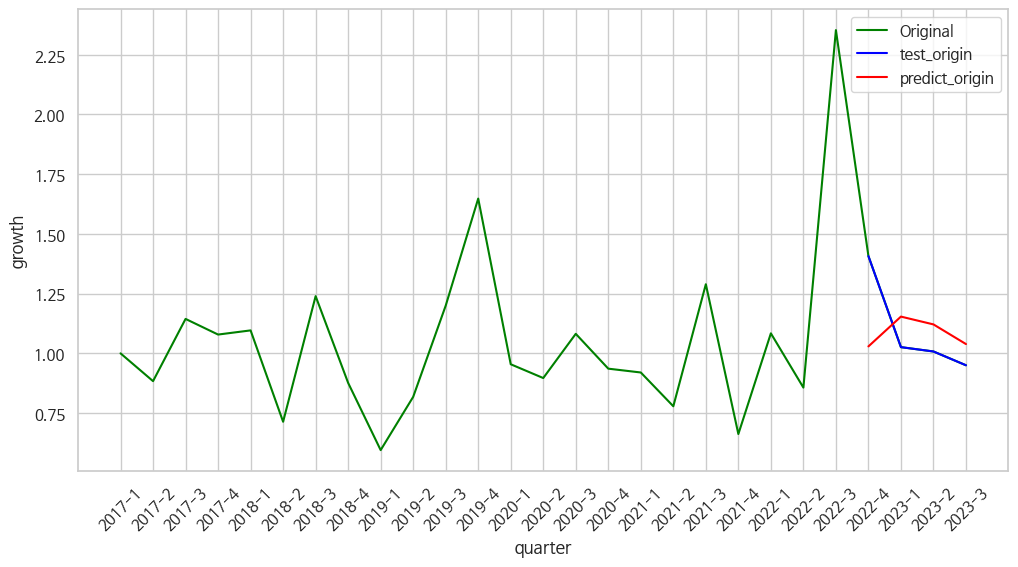

In [195]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [196]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.012018
std      0.244462
min     -0.127803
25%     -0.116910
50%     -0.101020
75%      0.027907
max      0.377914
dtype: float64

In [197]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 34ms/step
[[0.23647314]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0106924772262573 


###시장성

In [198]:
### X / y 데이터 생성
X = ap_meat[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_meat.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   1.384579e+09  1.000000 -10.000000
1   1.223484e+09  0.883650 -11.111111
2   1.399748e+09  1.144068   0.000000
3   1.509788e+09  1.078614 -12.500000
4   1.654745e+09  1.096012   0.000000
5   1.181066e+09  0.713745   0.000000
6   1.463792e+09  1.239382   0.000000
7   1.282807e+09  0.876358   0.000000
8   7.633800e+08  0.595086   0.000000
9   6.243394e+08  0.817862   0.000000
10  7.489071e+08  1.199519   0.000000
11  1.233940e+09  1.647654  20.000000
12  1.177562e+09  0.954311   0.000000
13  1.055828e+09  0.896622   0.000000
14  1.142062e+09  1.081674   0.000000
15  1.068846e+09  0.935891   0.000000
16  9.832136e+08  0.919883   0.000000
17  7.654516e+08  0.778520   0.000000
18  9.868251e+08  1.289206   0.000000
19  6.536255e+08  0.662352   0.000000
20  7.083506e+08  1.083725   0.000000
21  6.068222e+08  0.856669   0.000000
22  1.427614e+09  2.352608  16.666667
23  2.008588e+09  1.406954   0.000000
24  1.149439e+09  1.025935   2.150745
25  9.381678

In [199]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [200]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.23637729 0.23481937 0.46054346]
 [0.19833162 0.20197509 0.321372  ]]


In [201]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [202]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [203]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2610
Epoch 1: val_loss improved from inf to 0.44202, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2610 - val_loss: 0.4420
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2602
Epoch 2: val_loss improved from 0.44202 to 0.44087, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.2602 - val_loss: 0.4409
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2593
Epoch 3: val_loss improved from 0.44087 to 0.43973, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.2593 - val_loss: 0.4397
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2585
Epoch 4: val_loss improved from 0.43973 to 0.43859, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.2585 - val_loss: 0.4386
Epoch 5/300
1/1 [=================

In [204]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 655ms/step
[[0.47066075]
 [0.67602545]
 [0.4701051 ]
 [0.42072904]]


In [205]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.829928,0.470661
2023-1,0.470615,0.676025
2023-2,0.413428,0.470105
2023-3,0.420729,0.420729


In [206]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 5].values       # 시장성이 ap_meat의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.829928,0.470661,1.776538e+08,104418880.0,7.323493e+07
2023-1,0.470615,0.676025,1.044095e+08,146281472.0,-4.187200e+07
2023-2,0.413428,0.470105,9.275235e+07,104305616.0,-1.155326e+07
2023-3,0.420729,0.420729,9.424055e+07,94240552.0,0.000000e+00


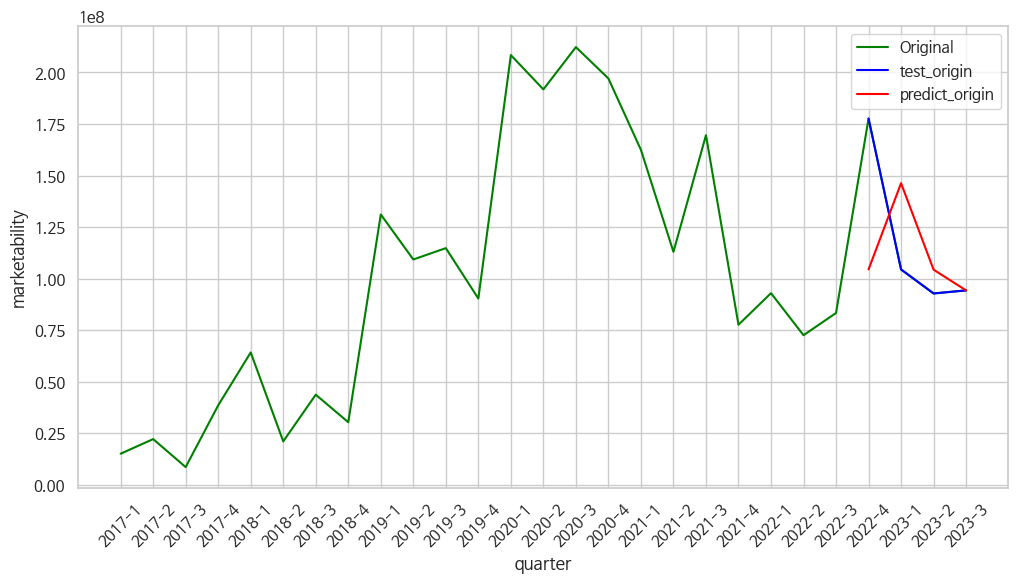

In [207]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [208]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.952418e+06
std      4.882620e+07
min     -4.187200e+07
25%     -1.913295e+07
50%     -5.776632e+06
75%      1.830873e+07
max      7.323493e+07
dtype: float64

In [209]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 21ms/step
[[0.39069012]]
--------------------------------------------------------------------------------
예측된 시장성  : 88117264.0 


### 순점포증감률

In [210]:
### X / y 데이터 생성
X = ap_meat[['분기당_매출_금액', '성장성', '시장성']]
y = ap_meat.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.384579e+09  1.000000  1.498868e+07
1   1.223484e+09  0.883650  2.206954e+07
2   1.399748e+09  1.144068  8.476994e+06
3   1.509788e+09  1.078614  3.845886e+07
4   1.654745e+09  1.096012  6.413210e+07
5   1.181066e+09  0.713745  2.095333e+07
6   1.463792e+09  1.239382  4.363455e+07
7   1.282807e+09  0.876358  3.026179e+07
8   7.633800e+08  0.595086  1.310981e+08
9   6.243394e+08  0.817862  1.092451e+08
10  7.489071e+08  1.199519  1.147543e+08
11  1.233940e+09  1.647654  9.029599e+07
12  1.177562e+09  0.954311  2.084519e+08
13  1.055828e+09  0.896622  1.917921e+08
14  1.142062e+09  1.081674  2.123221e+08
15  1.068846e+09  0.935891  1.970836e+08
16  9.832136e+08  0.919883  1.624536e+08
17  7.654516e+08  0.778520  1.129506e+08
18  9.868251e+08  1.289206  1.695613e+08
19  6.536255e+08  0.662352  7.757550e+07
20  7.083506e+08  1.083725  9.289989e+07
21  6.068222e+08  0.856669  7.248577e+07
22  1.427614e+09  2.352608  8.327616e+07
23  2.008588e+09

In [211]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [212]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.23637729 0.23481937 0.41342842]
 [0.19833162 0.20197509 0.42072906]]


In [213]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [214]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [215]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2197
Epoch 1: val_loss improved from inf to 0.23466, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2197 - val_loss: 0.2347
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2189
Epoch 2: val_loss improved from 0.23466 to 0.23371, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2189 - val_loss: 0.2337
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2181
Epoch 3: val_loss improved from 0.23371 to 0.23277, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2181 - val_loss: 0.2328
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2173
Epoch 4: val_loss improved from 0.23277 to 0.23183, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.2173 - val_loss: 0.2318
Epoch 5/300
1/1 [=================

In [216]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 650ms/step
[[0.3176186 ]
 [0.50613266]
 [0.533219  ]
 [0.36057767]]


In [217]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.384615,0.317619
2023-1,0.450792,0.506133
2023-2,0.460543,0.533219
2023-3,0.321372,0.360578


In [218]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_meat의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.384615,0.317619,0.000000,-2.177395,2.177395
2023-1,0.450792,0.506133,2.150745,3.949311,-1.798566
2023-2,0.460543,0.533219,2.467662,4.829617,-2.361954
2023-3,0.321372,0.360578,-2.055410,-0.781226,-1.274184


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


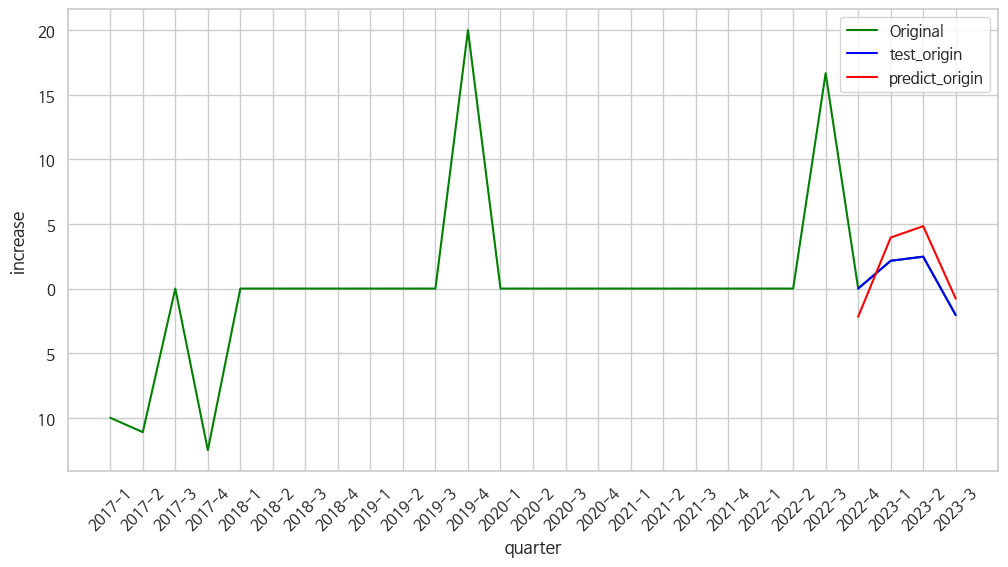

In [219]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_meat['분기'], ap_meat['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [220]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.814327
std      2.043343
min     -2.361954
25%     -1.939413
50%     -1.536375
75%     -0.411289
max      2.177395
dtype: float64

In [221]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 21ms/step
[[0.32879835]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.8140535354614258 


### 추가

In [222]:
ap_meat.loc[27] = ['2023-4', '육류판매', sales, growth, increase, marketability]

<ipython-input-222-60fa19095d60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_meat.loc[27] = ['2023-4', '육류판매', sales, growth, increase, marketability]


In [223]:
final_ap_meat = ap_meat
final_ap_meat

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,육류판매,1.384579e+09,1.000000,-10.000000,1.498868e+07
1,2017-2,육류판매,1.223484e+09,0.883650,-11.111111,2.206954e+07
2,2017-3,육류판매,1.399748e+09,1.144068,0.000000,8.476994e+06
3,2017-4,육류판매,1.509788e+09,1.078614,-12.500000,3.845886e+07
4,2018-1,육류판매,1.654745e+09,1.096012,0.000000,6.413210e+07
5,2018-2,육류판매,1.181066e+09,0.713745,0.000000,2.095333e+07
6,2018-3,육류판매,1.463792e+09,1.239382,0.000000,4.363455e+07
7,2018-4,육류판매,1.282807e+09,0.876358,0.000000,3.026179e+07
8,2019-1,육류판매,7.633800e+08,0.595086,0.000000,1.310981e+08
9,2019-2,육류판매,6.243394e+08,0.817862,0.000000,1.092451e+08


## 최종결과

In [224]:
### X / y 데이터 생성
X = ap_meat[['성장성', '시장성', '순점포증감률']]
y = ap_meat.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000  1.498868e+07 -10.000000
1   0.883650  2.206954e+07 -11.111111
2   1.144068  8.476994e+06   0.000000
3   1.078614  3.845886e+07 -12.500000
4   1.096012  6.413210e+07   0.000000
5   0.713745  2.095333e+07   0.000000
6   1.239382  4.363455e+07   0.000000
7   0.876358  3.026179e+07   0.000000
8   0.595086  1.310981e+08   0.000000
9   0.817862  1.092451e+08   0.000000
10  1.199519  1.147543e+08   0.000000
11  1.647654  9.029599e+07  20.000000
12  0.954311  2.084519e+08   0.000000
13  0.896622  1.917921e+08   0.000000
14  1.081674  2.123221e+08   0.000000
15  0.935891  1.970836e+08   0.000000
16  0.919883  1.624536e+08   0.000000
17  0.778520  1.129506e+08   0.000000
18  1.289206  1.695613e+08   0.000000
19  0.662352  7.757550e+07   0.000000
20  1.083725  9.289989e+07   0.000000
21  0.856669  7.248577e+07   0.000000
22  2.352608  8.327616e+07  16.666667
23  1.406954  1.776538e+08   0.000000
24  1.025935  1.044095e+08   2.150745
25  1.007786

In [225]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [226]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.20197509 0.42072906 0.321372  ]
 [0.23647315 0.39069014 0.32879835]]


In [227]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [228]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [229]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2215
Epoch 1: val_loss improved from inf to 0.19710, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2215 - val_loss: 0.1971
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2208
Epoch 2: val_loss improved from 0.19710 to 0.19635, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2208 - val_loss: 0.1964
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2200
Epoch 3: val_loss improved from 0.19635 to 0.19561, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.2200 - val_loss: 0.1956
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2192
Epoch 4: val_loss improved from 0.19561 to 0.19488, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2192 - val_loss: 0.1949
Epoch 5/300
1/1 [=================

In [230]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 635ms/step
[[0.47334027]
 [0.34427902]
 [0.31570837]
 [0.30207437]]


In [231]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_meat.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.387095,0.473340
2023-2,0.236377,0.344279
2023-3,0.198332,0.315708
2023-4,0.230857,0.302074


In [232]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_meat.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_meat의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.387095,0.473340,1.149439e+09,1.270334e+09,-120895360.0
2023-2,0.236377,0.344279,9.381678e+08,1.089421e+09,-151252992.0
2023-3,0.198332,0.315708,8.848367e+08,1.049371e+09,-164534720.0
2023-4,0.230857,0.302074,9.304292e+08,1.030260e+09,-99830464.0


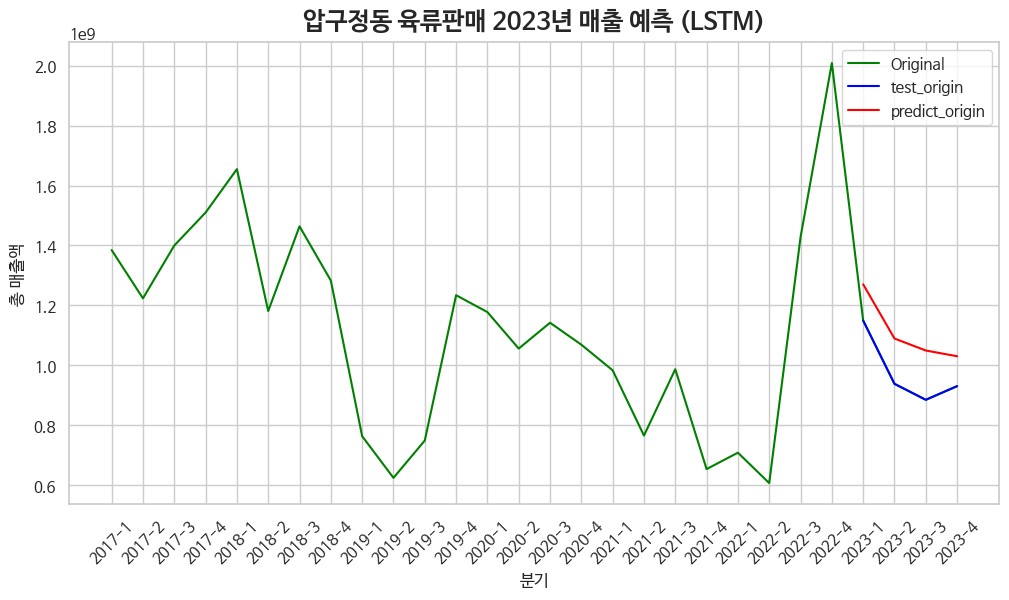

In [233]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('압구정동 육류판매 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)


plt.plot(ap_meat['분기'], ap_meat['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()